In [1]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:


df = pd.read_csv('train.csv')




In [6]:
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [7]:
df['Activity'].value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



X = df.drop('Activity',axis=1)
y = df['Activity']



le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)




In [11]:
log_reg = LogisticRegression(max_iter=100)

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print("Test accuracy:", accuracy)

Test accuracy: 0.9748470428280082


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
duplicate_columns = get_duplicate_columns(X_train)

In [34]:
duplicate_columns

{}

In [35]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

In [36]:
duplicate_columns = get_duplicate_columns(X_train)

In [37]:
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [38]:
X_train[['tBodyAccMag-mean()','tBodyAccMag-sma()','tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
3458,-0.986682,-0.986682,-0.986682,-0.986682
787,-0.221164,-0.221164,-0.221164,-0.221164
2953,-0.968532,-0.968532,-0.968532,-0.968532
2851,0.113899,0.113899,0.113899,0.113899
6058,-0.993209,-0.993209,-0.993209,-0.993209
...,...,...,...,...
3064,-0.992640,-0.992640,-0.992640,-0.992640
6309,-0.918263,-0.918263,-0.918263,-0.918263
6151,-0.862592,-0.862592,-0.862592,-0.862592
6363,-0.984155,-0.984155,-0.984155,-0.984155


In [39]:
for one_list in duplicate_columns.values():
    X_train.drop(columns=one_list,inplace=True)
    X_test.drop(columns=one_list,inplace=True)

2.Variance Threshold

In [40]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [41]:
sel.fit(X_train)

VarianceThreshold(threshold=0.05)

In [42]:
sum(sel.get_support())

351

In [43]:
columns = X_train.columns[sel.get_support()]

In [44]:
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=351)

In [45]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [46]:
print(X_train.shape)
print(X_test.shape)

(5881, 351)
(1471, 351)


# 3 Correlation

In [47]:
import seaborn as sns

<Axes: >

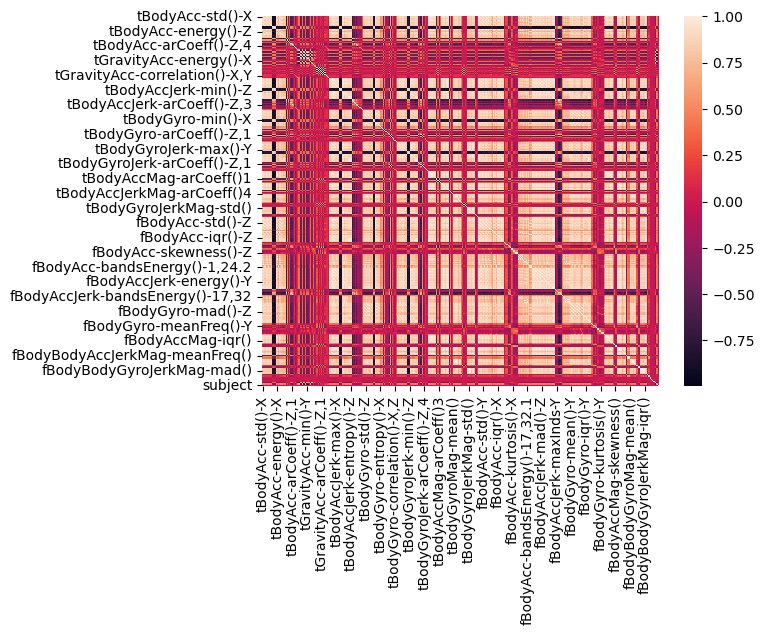

In [48]:
sns.heatmap(X_train.corr())

In [49]:
corr_matrix = X_train.corr()

In [51]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if corr_matrix.loc[columns[i],columns[j]]  > 0.95:
            columns_to_drop.append(columns[j])
            
            print(len(columns_to_drop))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [52]:
len(columns_to_drop)

1522

In [53]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [54]:
print(X_train.shape)
print(X_test.shape)

(5881, 153)
(1471, 153)


# ANOVA

In [57]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

sel = SelectKBest(f_classif,k=100).fit(X_train,y_train)

X_train.columns[sel.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-energy()-Z', 'tBodyAcc-entropy()-X',
       'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z',
       'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2',
       'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entro

In [58]:
columns = X_train.columns[sel.get_support()]

In [59]:


X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)



#    Moment of Truth

In [62]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train,y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("Test accuracy :", accuracy)

Test accuracy : 0.9653297076818491


#  CHI - SQUARE TEST

In [65]:
titanic = pd.read_csv('tested.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [66]:
ct = pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
ct

Sex,female,male,All
Survived,,,
0,0,266,266
1,152,0,152
All,152,266,418


In [67]:
from scipy.stats import chi2_contingency
chi2_contingency(ct)

Chi2ContingencyResult(statistic=418.0, pvalue=3.586514384057183e-89, dof=4, expected_freq=array([[ 96.72727273, 169.27272727, 266.        ],
       [ 55.27272727,  96.72727273, 152.        ],
       [152.        , 266.        , 418.        ]]))

In [68]:
score = []


for feature in titanic.columns[:-1]:
    
    ct = pd.crosstab(titanic['Survived'],titanic[feature])
    
    p_value = chi2_contingency(ct)[1]
    score.append(p_value)

<Axes: >

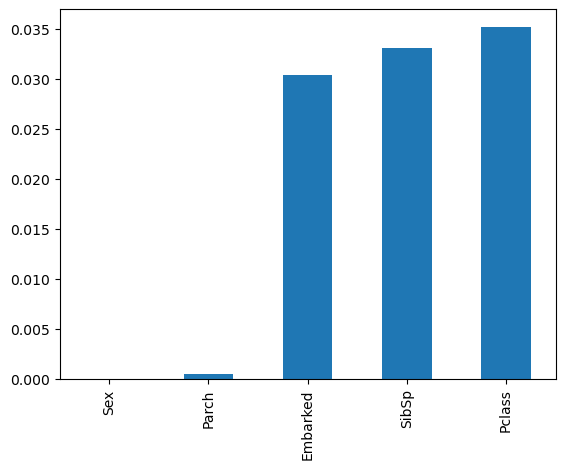

In [69]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

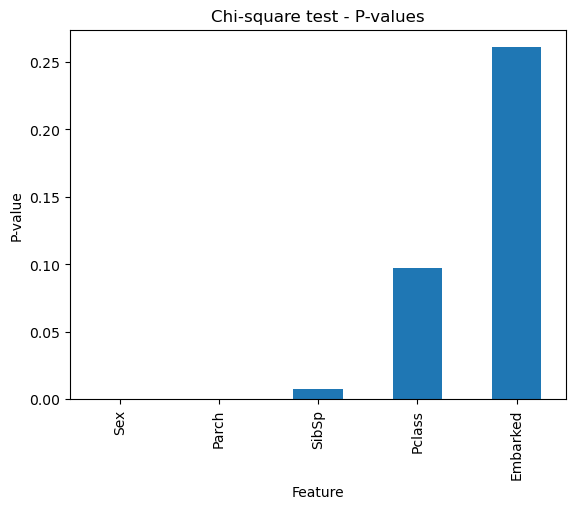

In [70]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']


chi_scores = chi2(X,y)

p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

p_values.plot.bar()


plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()